# PART ONE

In [1]:
# Importing pandas
import pandas as pd

# Importing the course arrays
conversion = pd.read_csv("datasets/ad_conversion.csv")
churn = pd.read_csv("datasets/churn.csv")
fish = pd.read_csv("datasets/fish.csv")
sp500 = pd.read_csv("datasets/sp500_yearly_returns.csv")
taiwan = pd.read_csv("datasets/taiwan_real_estate2.csv")

## Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

`taiwan_real_estate` is available as a pandas DataFrame.

## Instructions

- Import the seaborn package, aliased as sns.
- Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).

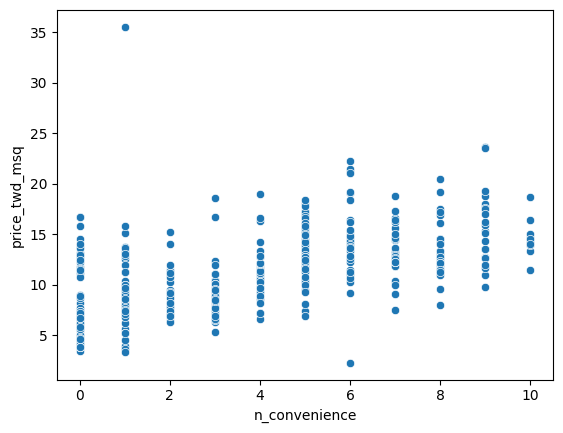

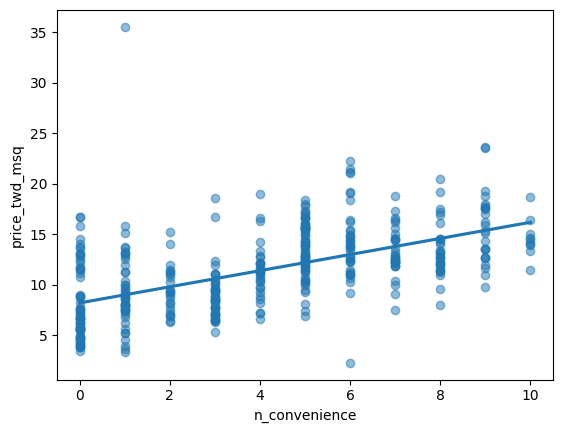

In [2]:
# Add your code snippets here
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience", y="price_twd_msq", data = taiwan)

# Show the plot
plt.show()

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## Linear regression with ols()

While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Time to run your first model!

taiwan_real_estate is available. TWD is an abbreviation for Taiwan dollars.

In addition, for this exercise and the remainder of the course, the following packages will be imported and aliased if necessary: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

### Instructions 

- Import the `ols()` function from the statsmodels.formula.api package.
- Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and `taiwan_real_estate` as the dataset. Name it mdl_price_vs_conv.
- Fit the model.
- Print the parameters of the fitted model.
- The model had an Intercept coefficient of 8.2242. What does this mean?
- The model had an n_convenience coefficient of 0.7981. What does this mean?

In [3]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


Lively linear regression modeling! The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

## Visualizing numeric vs. categorical
If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

taiwan_real_estate is available.

### Instructions

- Using taiwan_real_estate, plot a histogram of price_twd_msq with 10 bins. Split the plot by house_age_years to give 3 panels.

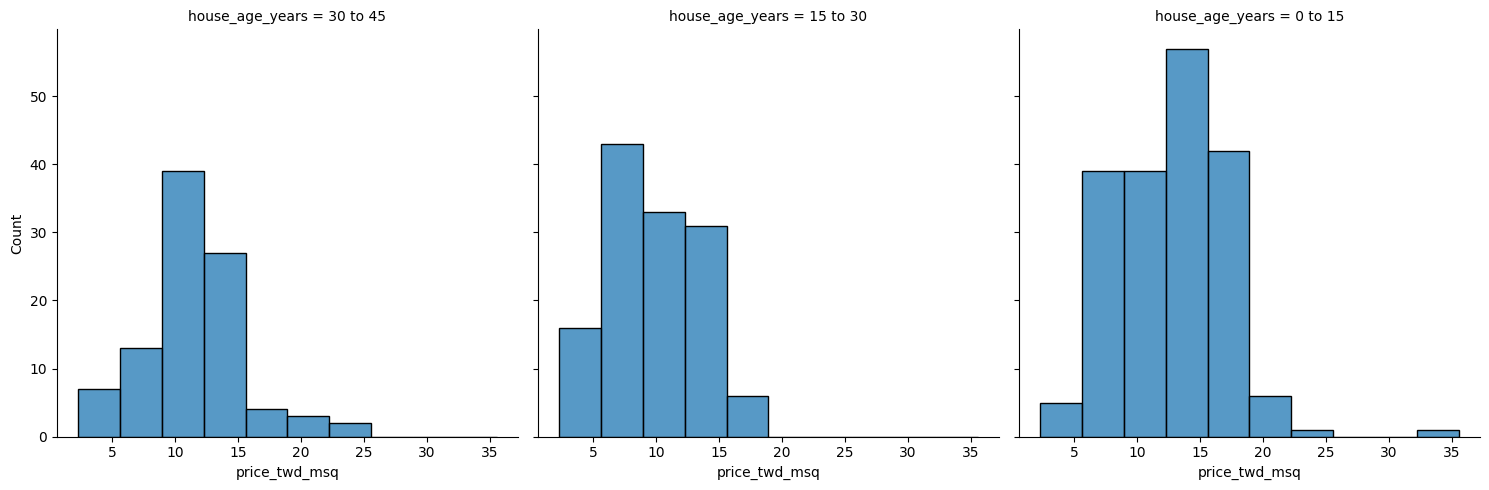

In [4]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan,
         x='price_twd_msq',
         col="house_age_years",
         bins=10)

# Show the plot
plt.show()

## Calculating means by category
A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

taiwan_real_estate is available as a pandas DataFrame.

### Instructions

- Group taiwan_real_estate by house_age_years and calculate the mean price (price_twd_msq) for each age group. 
- Assign the result to mean_price_by_age.
- Print the result and inspect the output.

In [5]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


## Linear regression with a categorical explanatory variable
Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.

taiwan_real_estate is available and the ols() function is also loaded.

### Instructions 

- Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. 
- Assign to mdl_price_vs_age.
- Print its parameters.
- Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0.
- Print its parameters.

In [6]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data =taiwan).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

# Update the model formaula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years", data=taiwan).fit()

# Print the parameter of the fitted model
print(mdl_price_vs_age0)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


## Predicting house prices

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

taiwan_real_estate is available. The fitted linear regression model of house price versus number of convenience stores is available as mdl_price_vs_conv. For future exercises, when a model is available, it will also be fitted.

### Instructions

- Import the numpy package using the alias np.
- Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience, takes the integer values from zero to ten.
- Print explanatory_data.
- Use the model mdl_price_vs_conv to make predictions from explanatory_data and store it as price_twd_msq.
- Print the predictions.

In [7]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


## Visualizing predictions

The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

prediction_data is available. The code for the plot you created using sns.regplot() in Chapter 1 is shown.

### Instructions

- Create a new figure to plot multiple layers.
- Extend the plotting code to add points for the predictions in prediction_data. Color the points red.
- Display the layered plot.

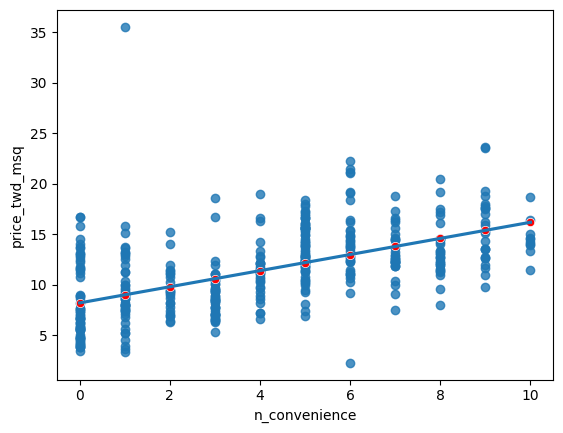

In [8]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
y="price_twd_msq",
data=prediction_data,
color="red")

# Show the layered plot
plt.show()

## The limits of prediction

In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

`mdl_price_vs_conv` is available.

### Instructions 

- Create some impossible explanatory data. Define a DataFrame impossible with one column, n_convenience, set to -1 in the first row, and 2.5 in the second row.

In [9]:
# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience':[-1,2.5]})

## The limits of prediction

In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

mdl_price_vs_conv is available.

### Instructions 

- Try making predictions on your two impossible cases. What happens?

In [10]:
mdl_price_vs_conv.predict(pd.DataFrame({'n_convenience':[-1]}))


mdl_price_vs_conv.predict(pd.DataFrame({'n_convenience':[2.5]}))

first_case = pd.DataFrame({'n_convenience':[-1]})
second_case = pd.DataFrame({'n_convenience':[2.5]})
pred1 = first_case.assign(new = mdl_price_vs_conv.predict(first_case))
pred2 = second_case.assign(new1 = mdl_price_vs_conv.predict(second_case))
print(pred1)
print(pred2)

   n_convenience       new
0             -1  7.426158
   n_convenience       new1
0            2.5  10.219437


Legendary limit detection! Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

## Extracting model elements
The model object created by ols() contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

mdl_price_vs_conv is available.

### Instructions 

- Print the parameters of mdl_price_vs_conv.
- Print the fitted values of mdl_price_vs_conv.
- Print the residuals of mdl_price_vs_conv.
- Print a summary of mdl_price_vs_conv.

In [11]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           3.41e-37
Time:                        11:00:01   Log-Likelihood:                -1091.1
No. Observations:                 414   

## Manually predicting house prices
You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.


mdl_price_vs_conv and explanatory_data are available.

### Instructions

- Get the coefficients/parameters of mdl_price_vs_conv, assigning to coeffs.
- Get the intercept, which is the first element of coeffs, assigning to intercept.
- Get the slope, which is the second element of coeffs, assigning to slope.
- Manually predict price_twd_msq using the formula, specifying the intercept, slope, and explanatory_data.
- Run the code to compare your manually calculated predictions to the results from .predict().

In [12]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope*explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


## Plotting consecutive portfolio returns

Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The sp500_yearly_returns dataset contains three columns:

variable	meaning
symbol	Stock ticker symbol uniquely identifying the company.
return_2018	A measure of investment performance in 2018.
return_2019	A measure of investment performance in 2019.
A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

sp500_yearly_returns is available as a pandas DataFrame.

### Instructions

- Create a new figure, fig, to enable plot layering.
- Generate a line at y equals x. This has been done for you.
- Using sp500_yearly_returns, draw a scatter plot of return_2019 vs. return_2018 with a linear regression trend line, without a standard error ribbon.
- Set the axes so that the distances along the x and y axes look the same.

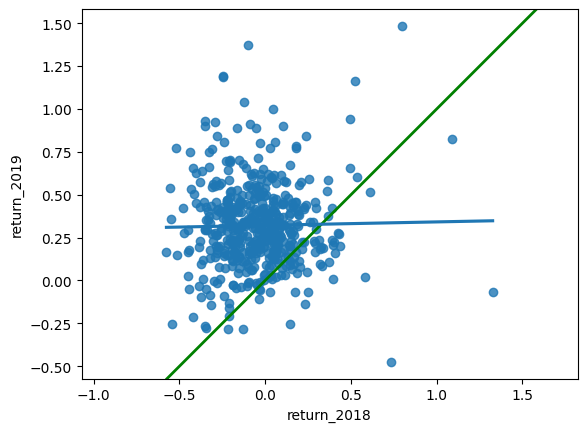

In [13]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018", y="return_2019",data=sp500, ci = None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

## Modeling consecutive returns
Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

sp500_yearly_returns is available and ols() is loaded.

### Instructions 

- Run a linear regression on return_2019 versus return_2018 using sp500_yearly_returns and fit the model. Assign to mdl_returns.
- Print the parameters of the model.
- Create a DataFrame named explanatory_data. Give it one column (return_2018) with 2018 returns set to a list containing -1, 0, and 1.
- Use mdl_returns to predict with explanatory_data in a print() call.

In [14]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data=sp500).fit()

# Print the parameters
print(mdl_returns.params)

mdl_returns = ols("return_2019 ~ return_2018", data=sp500).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018':[-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

Intercept      0.321321
return_2018    0.020069
dtype: float64
0    0.301251
1    0.321321
2    0.341390
dtype: float64


## Transforming the explanatory variable
If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

taiwan_real_estate is available.

### Instructions 

- Look at the plot.
- Add a new column to taiwan_real_estate called sqrt_dist_to_mrt_m that contains the square root of dist_to_mrt_m.
- Create the same scatter plot as the first one, but use the new transformed variable on the x-axis instead.
- Look at the new plot. Notice how the numbers on the x-axis have changed. This is a different line to what was shown before. Do the points track the line more closely?
- Run a linear regression of price_twd_msq versus the square root of dist_to_mrt_m using taiwan_real_estate.
- Print the parameters.
- Create a DataFrame of predictions named prediction_data by adding a column of predictions called price_twd_msq to explanatory_data. Predict using mdl_price_vs_dist and explanatory_data.
- Print the predictions.
- Add a layer to your plot containing points from prediction_data, colored "red".

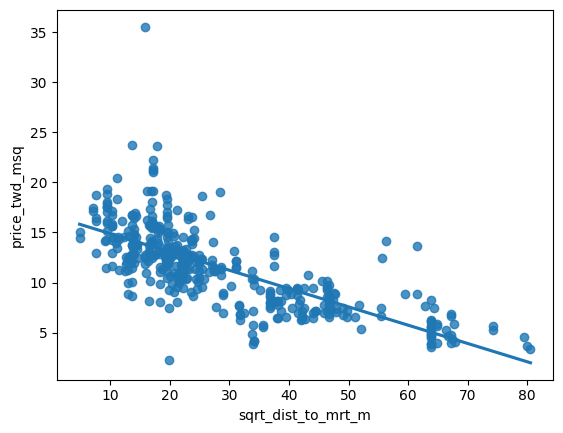

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64
   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


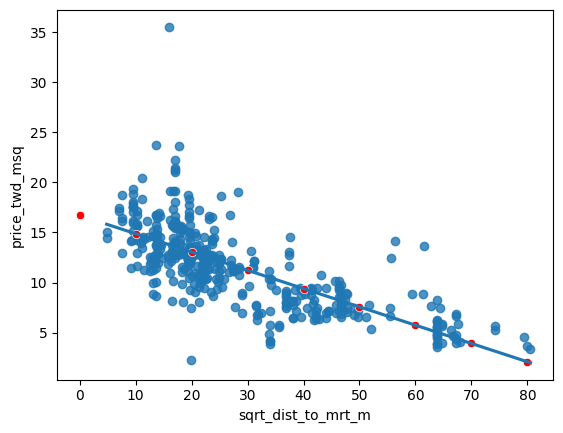

In [15]:
# Create sqrt_dist_to_mrt_m
taiwan["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot( x="sqrt_dist_to_mrt_m",
y="price_twd_msq",data=taiwan,ci=None)
plt.show()

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data = taiwan).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="sqrt_dist_to_mrt_m", y="price_twd_msq", color='red')
plt.show()

## Transforming the response variable too
The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

ad_conversion is available as a pandas DataFrame.

### Instructions 

- Look at the plot.
- Create a qdrt_n_impressions column using n_impressions raised to the power of 0.25.
- Create a qdrt_n_clicks column using n_clicks raised to the power of 0.25.
- Create a regression plot using the transformed variables. Do the points track the line more closely?
- Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions using ad_conversion and assign it to mdl_click_vs_impression.
- Complete the code to create the prediction data.

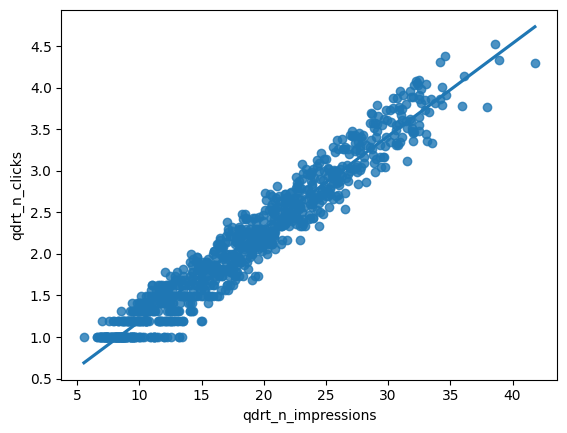

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [16]:
# Create qdrt_n_impressions and qdrt_n_clicks
conversion["qdrt_n_impressions"] = conversion["n_impressions"] ** 0.25
conversion["qdrt_n_clicks"] = conversion["n_clicks"] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data = conversion, ci = None)
plt.show()

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

## Back transformation

In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

prediction_data, which you created in the previous exercise, is available.

### Instructions 

- Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.
- Edit the plot to add a layer of points from prediction_data, colored "red".

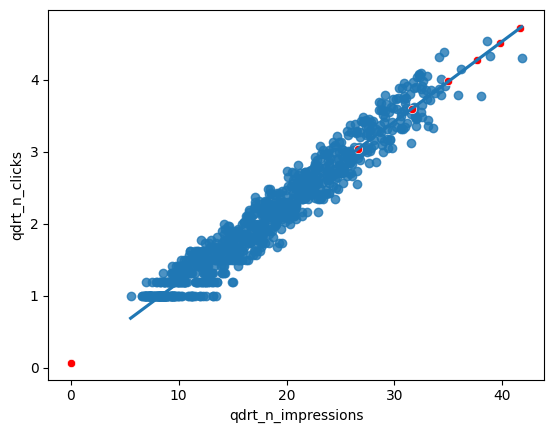

In [17]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="qdrt_n_impressions", y="qdrt_n_clicks", color='red')
plt.show()

## Coefficient of determination
The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: mdl_click_vs_impression_orig models n_clicks versus n_impressions. mdl_click_vs_impression_trans is the transformed model you saw in Chapter 2. It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.

### Instructions 

- Print the summary of mdl_click_vs_impression_orig.
- Do the same for mdl_click_vs_impression_trans.
- Print the coefficient of determination for mdl_click_vs_impression_orig.
- Do the same for mdl_click_vs_impression_trans.

In [18]:
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=conversion).fit()

mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=conversion).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

## Residual standard error
Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

Again, you'll look at the models from the advertising pipeline, mdl_click_vs_impression_orig and mdl_click_vs_impression_trans.

### Instructions 

- Calculate the MSE of mdl_click_vs_impression_orig, assigning to mse_orig.
- Using mse_orig, calculate and print the RSE of mdl_click_vs_impression_orig.
- Do the same for mdl_click_vs_impression_trans.

In [19]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


## Drawing diagnostic plots
It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

taiwan_real_estate is available as a pandas DataFrame and mdl_price_vs_conv is available.

### Instructions 

- Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.
- Import qqplot() from statsmodels.api.
- Create the Q-Q plot of the residuals.
- Create the scale-location plot.
- Import qqplot() from statsmodels.api.
- Create the Q-Q plot of the residuals.
- Create the scale-location plot.

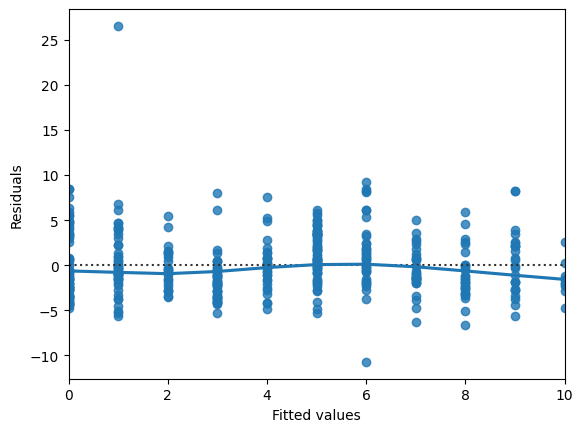

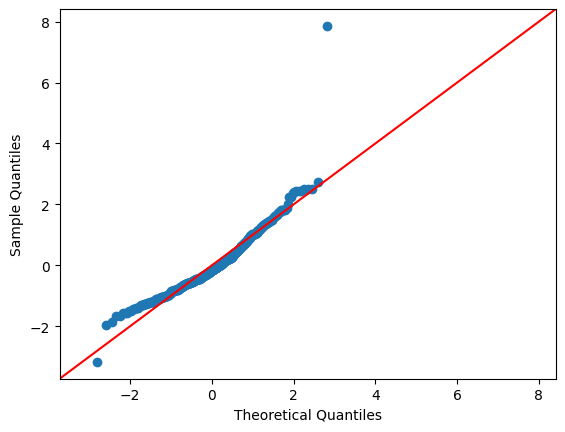

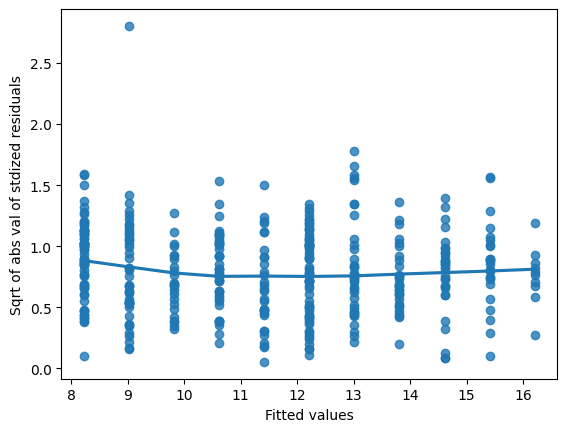

In [20]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

## Extracting leverage and influence
In the last few exercises, you explored which observations had the highest leverage and influence. Now you'll extract those values from the model.

`mdl_price_vs_dist` and `taiwan_real_estate` are available.

### Instructions 

- Get the summary frame from mdl_price_vs_dist and save as summary_info.
- Add the hat_diag column of summary_info to taiwan_real_estate as the leverage column.
- Sort `taiwan_real_estate` by leverage in descending order and print the head.
- Add the cooks_d column from summary_info to taiwan_real_estate as the cooks_dist column.
- Sort taiwan_real_estate by cooks_dist in descending order and print the head.

In [21]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan.sort_values('leverage', ascending = False).head())

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan['cooks_dist'] = summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan.sort_values('cooks_dist', ascending=False).head())

     dist_to_mrt_m  n_convenience  ... sqrt_dist_to_mrt_m  leverage
347       6488.021              1  ...          80.548253  0.026665
116       6396.283              1  ...          79.976765  0.026135
249       6306.153              1  ...          79.411290  0.025617
255       5512.038              1  ...          74.243101  0.021142
8         5512.038              1  ...          74.243101  0.021142

[5 rows x 6 columns]
     dist_to_mrt_m  n_convenience  ...  leverage  cooks_dist
270       252.5822              1  ...  0.003849    0.115549
148      3780.5900              0  ...  0.012147    0.052440
228      3171.3290              0  ...  0.009332    0.035384
220       186.5101              9  ...  0.004401    0.025123
113       393.2606              6  ...  0.003095    0.022813

[5 rows x 7 columns]


## Exploring the explanatory variables
When the response variable is logical, all the points lie on the 
 and 
 lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

You will use these histograms to get to know the financial services churn dataset seen in the video.

churn is available as a pandas DataFrame.

### Instructions 

- In a `sns.displot()` call on the churn data, plot time_since_last_purchase as two histograms, split for each has_churned value.
- Redraw the histograms using the time_since_first_purchase column, split for each has_churned value.

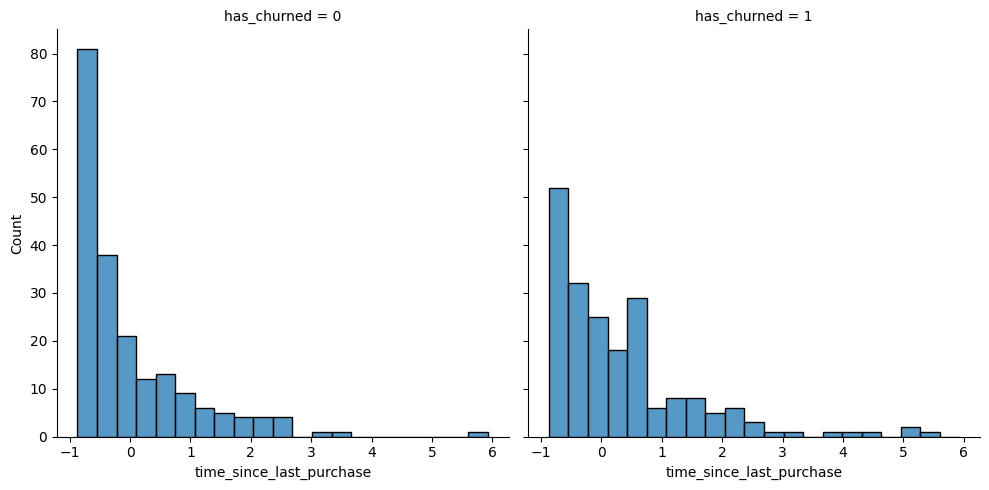

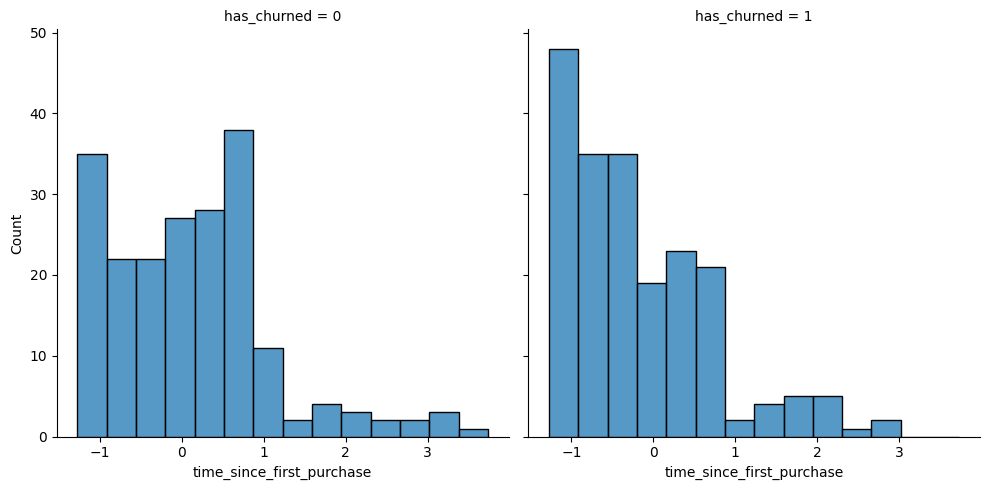

In [22]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x= "time_since_last_purchase", col="has_churned")

plt.show()

# Redraw the plot with time_since_first_purchase
sns.displot(data=churn, x="time_since_first_purchase", col="has_churned")

plt.show()

## Visualizing linear and logistic models
As with linear regressions, regplot() will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

churn is available.

### Instructions 

- Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a red linear regression trend line (without a standard error ribbon).
- Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a blue logistic regression trend line (without a standard error ribbon).

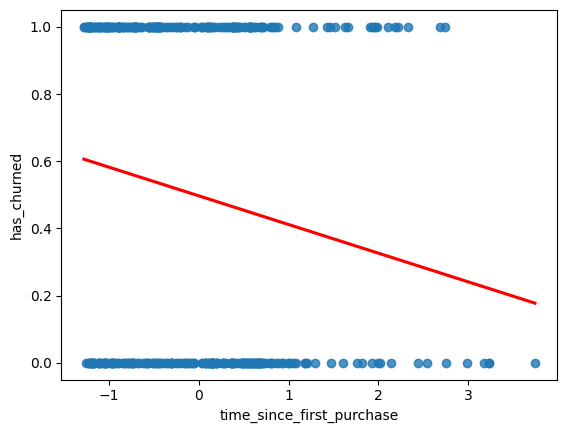

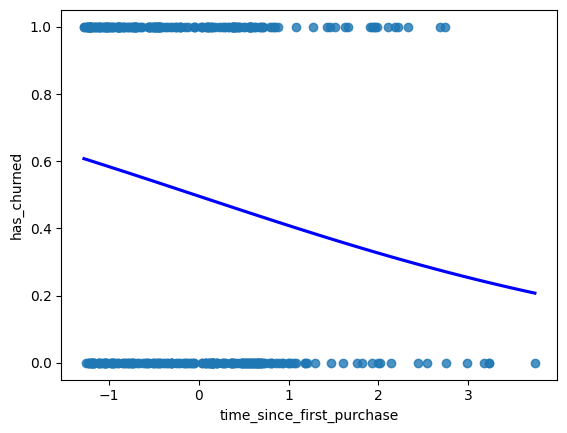

In [23]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x ="time_since_first_purchase", y= "has_churned", data=churn, ci=None,line_kws={"color": "red"})

plt.show()

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data=churn, x="time_since_first_purchase", y="has_churned", ci=None, line_kws={'color':'blue'}, logistic=True)

plt.show()

## Logistic regression with logit()

Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. You then use .fit() to fit the model to the data.

Here, you'll model how the length of relationship with a customer affects churn.

churn is available.

### Instructions

- Import the logit() function from statsmodels.formula.api.
- Fit a logistic regression of has_churned versus time_since_first_purchase using the churn dataset. Assign to mdl_churn_vs_relationship.
- Print the parameters of the fitted model.

In [24]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

Two variables are available:

mdl_churn_vs_relationship is the fitted logistic regression model of has_churned versus time_since_first_purchase.
explanatory_data is a DataFrame of explanatory values.

### Instructions 

- Create a DataFrame, prediction_data, by assigning a column has_churned to explanatory_data.
- In the has_churned column, store the predictions of the probability of churning: use the model, mdl_churn_vs_relationship, and the explanatory data, explanatory_data.
- Print the first five lines of the prediction DataFrame.

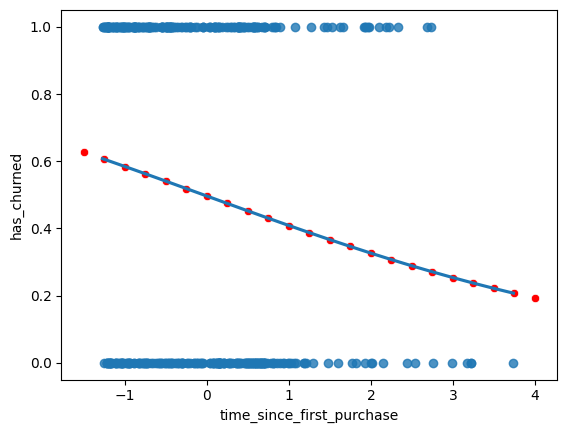

In [32]:
# Cretae explanatory data
explanatory_data = pd.DataFrame(
  {"time_since_first_purchase": np.arange(-1.50, 4.25, 0.25)})
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(data=churn,  x="time_since_first_purchase", y="has_churned",ci=None, logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(data = prediction_data, x="time_since_first_purchase", y="has_churned", color="red")

plt.show()


## Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

### Instructions

- Update prediction_data to add a column of the most likely churn outcome, most_likely_outcome.
- Print the first five lines of prediction_data.

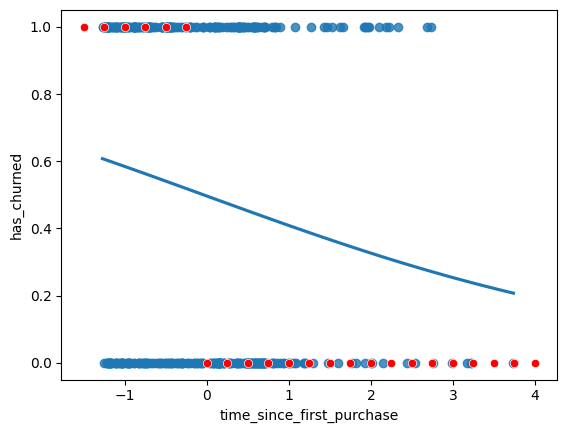

In [34]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(data=prediction_data, x="time_since_first_purchase",
            y="most_likely_outcome", color='red')

plt.show()

## Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

`mdl_churn_vs_relationship`, `explanatory_data`, and `prediction_data` are available from the previous exercise.

### Instructions

- Update prediction_data to add a column, odds_ratio, of the odds ratios.
- Print the first five lines of prediction_data.

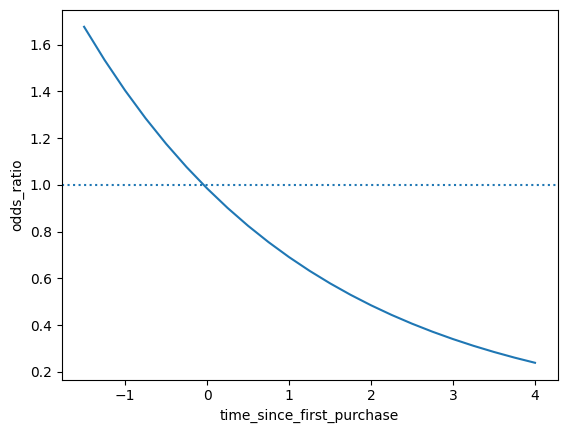

In [35]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(data=prediction_data, x="time_since_first_purchase", y='odds_ratio')

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

## Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

`mdl_churn_vs_relationship`, `explanatory_data`, and `prediction_data` are available from the previous exercise.

### Instructions 

- Update prediction_data to add a log_odds_ratio column derived from odds_ratio.
- Print the first five lines of prediction_data.

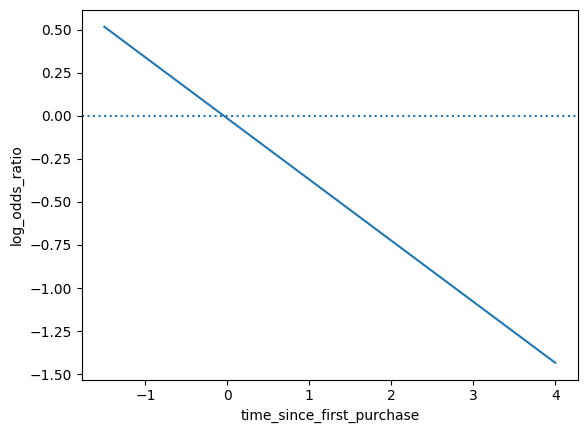

In [36]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

True positive: The customer churned and the model predicted they would.  
False positive: The customer didn't churn, but the model predicted they would.  
True negative: The customer didn't churn and the model predicted they wouldn't.  
False negative: The customer churned, but the model predicted they wouldn't.  
churn and mdl_churn_vs_relationship are available.

### Instructions

- Get the actual responses by subsetting the has_churned column of the dataset. Assign to actual_response.
- Get the "most likely" predicted responses from the model. Assign to predicted_response.
- Create a DataFrame from actual_response and predicted_response. Assign to outcomes.
- Print outcomes as a table of counts, representing the confusion matrix. This has been done for you.

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64
[[112.  88.]
 [ 76. 124.]]


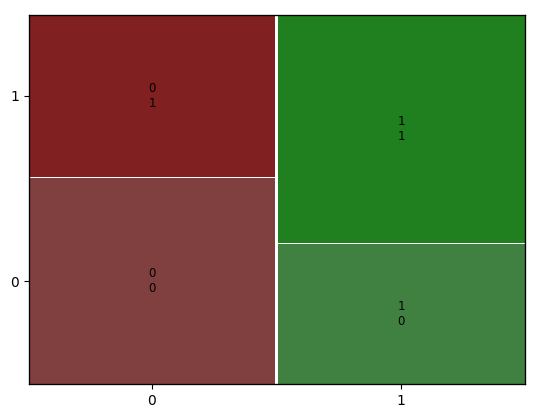

In [38]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         'predicted_response': predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Measuring logistic model performance
As you know by now, several metrics exist for measuring the performance of a logistic regression model. In this last exercise, you'll manually calculate accuracy, sensitivity, and specificity. Recall the following definitions:

Accuracy is the proportion of predictions that are correct.
$$
  accuracy = \frac{TN+FP}{TN+FP+FN+TP}
$$
 
Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.
$$
  sensitivity = \frac{TP}{TP+FN}
$$
 

Specificity is the proportion of false observations that are correctly predicted by the model as being false.
$$
  specificity = \frac{FN}{TN+FP}
$$
 
churn, mdl_churn_vs_relationship, and conf_matrix are available.

### Instructions

- Extract the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) from conf_matrix.
- Calculate the accuracy of the model.
- Calculate the sensitivity of the model.
- Calculate the specificity of the model.

In [39]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/ (TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
